<a href="https://colab.research.google.com/github/sangkonpark/1day-1commit/blob/main/Sparta_ColdingClub_3%EA%B0%95_%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1_%EB%8B%B5%EC%95%88_%EB%B0%95%EC%83%81%EA%B3%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. 탐색적 데이터 분석을 통해 각종 차트로 시각화해봅시다.

Q2. 앞서 자전거 수요 예측하기에서 사용했던 다음의 선형 회귀 모델을 학습합니다.

Q3. 자전거 수요 예측 때와 마찬가지로 각 특성들의 coefficients 값을 출력해보세요.

각 변수의 의미는 다음과 같습니다:  

TOWN: 소속 도시 이름  

TOWN_Number : 소속 도시의 고유 번호  

LON : 경도(Longitudes)  

LAT : 위도(Latitudes)    

CMEDV: 주택 가격 중앙값  

CRIM: 도시시(Town) 별 1인당 범죄율  

ZN: 25,000 평방 피트를 초과하는 거주지역의 비율  

INDUS: 비소매상업지역이 점유하고 있는 토지 비율  

CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)  

NOX: 소속 도시의 농축 일산화질소  

RM: 주택 1가구당 평균 방의 개수  

AGE: 1940년 이전에 건축된 소유주택의 비율  

DIS: 5개의 보스턴 직업센터까지의 접근성 지수  

RAD: 방사형 도로까지의 접근성 지수  

TAX: 10,000 달러 당 재산세율  

PTRATIO: 자치시(Town)별 학생/교사 비율  

B: 1000(Bk - 0.63)^2, 여기서 Bk는 도시(Town)별 흑인의 비율을 말한다.   

LSTAT: 하위 계층 비율  

# 01 데이터 로드

In [3]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup

boston_df = pd.read_csv('Sparta_CodingClub_Boston.csv')

In [4]:
boston_df

,TOWN,TOWN#,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,0,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,1,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,1,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,2,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,2,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,91,-70.9860,42.2312,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,Winthrop,91,-70.9910,42.2275,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,Winthrop,91,-70.9948,42.2260,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,Winthrop,91,-70.9875,42.2240,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


# 02 데이터 크기 확인

In [5]:
len(boston_df)

506

In [6]:
len(boston_df.columns)

18

In [8]:
boston_df.shape

(506, 18)

# 03 데이터 타입 확인

In [18]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   TOWN#    506 non-null    int64  
 2   LON      506 non-null    float64
 3   LAT      506 non-null    float64
 4   CMEDV    506 non-null    float64
 5   CRIM     506 non-null    float64
 6   ZN       506 non-null    float64
 7   INDUS    506 non-null    float64
 8   CHAS     506 non-null    int64  
 9   NOX      506 non-null    float64
 10  RM       506 non-null    float64
 11  AGE      506 non-null    float64
 12  DIS      506 non-null    float64
 13  RAD      506 non-null    int64  
 14  TAX      506 non-null    int64  
 15  PTRATIO  506 non-null    float64
 16  B        506 non-null    float64
 17  LSTAT    506 non-null    float64
dtypes: float64(13), int64(4), object(1)
memory usage: 71.3+ KB


# 04 결측값 확인

In [13]:
boston_df.isnull().sum()

TOWN       0
TOWN#      0
LON        0
LAT        0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

# 05 데이터의 수치적 통계 확인

In [14]:
boston_df.describe()

,TOWN#,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,47.531621,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,27.571401,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.000000,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,26.250000,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,42.000000,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,78.000000,-71.019625,42.252250,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,91.000000,-70.810000,42.381000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
boston_df['NOX'].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

# 06 Q1. 탐색적 데이터 분석을 통해 각종 차트로 시각화해봅시다.

06.01 바 차트

In [21]:
boston_df['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

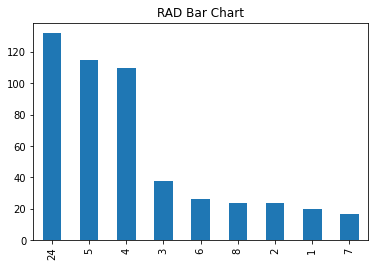

In [22]:
boston_df['RAD'].value_counts().plot(kind='bar', title='RAD Bar Chart')

In [ ]:
import seaborn as sns

06.02 히스토그램